#Pandas and first Data Science Notebook using the Olympics Data Set

#Step 1: Load and Explore the Dataset

We'll start by loading the dataset and taking a quick look at a random selection of cells.

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive

In [3]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os

# List files in a specific directory in your Google Drive
directory = '/content/drive/My Drive'
files = os.listdir(directory)
print(files)


['.ipynb_checkpoints', 'Monmouth_University', 'Archive', 'Personal']


In [5]:
# Read a file from Google Drive
#file_path = '/content/drive/My Drive/your_file.txt'  # Replace with your file's path

In [6]:
# Read a file from Google Drive
file_path = '/content/drive/My Drive/Monmouth_University/Fall_2024/Fall_24_DS_520_Intro_to_ML_Tuesday/Week_1_Python_Fundamentals/Code/olympics_dataset.csv'  # Replace with your file's path

In [7]:
df = pd.read_csv(file_path)

In [8]:
# Display 3 random rows from the DataFrame
df.sample(3)

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
90838,110057,David Jones,M,United States Virgin Islands,ISV,1972,Summer,Munich,Sailing,Sailing Mixed Three Person Keelboat,No medal
104349,127087,Samaisuk Krissanasuwan,M,Thailand,THA,1964,Summer,Tokyo,Cycling,"Cycling Men's Team Pursuit, 4,000 metres",No medal
29862,35776,Wlter Carmona,M,Brazil,BRA,1980,Summer,Moskva,Judo,Judo Men's Middleweight,No medal


#Step 2: Descriptive Statistics

Next, let's generate descriptive statistics for the numerical columns in the dataset.

In [9]:
# Output descriptive statistics
descriptive_stats = df.describe()
print(descriptive_stats)


          player_id           Year
count  2.525650e+05  252565.000000
mean   2.305499e+05    1981.743908
std    4.289330e+05      32.596548
min    0.000000e+00    1896.000000
25%    5.713700e+04    1960.000000
50%    1.356110e+05    1988.000000
75%    2.118590e+05    2008.000000
max    9.460001e+06    2024.000000


#Step 3: Show Missing Values

We should also check for any missing values in the dataset.

In [10]:
# Show missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values)


player_id    0
Name         0
Sex          0
Team         0
NOC          0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal        0
dtype: int64


Step 4: Identify Categorical and Numerical Variables

We'll create lists of the categorical and numerical variables in the dataset.

In [11]:
# Identify categorical and numerical variables
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()
numerical_vars = df.select_dtypes(include=['number']).columns.tolist()

print("Categorical Variables:", categorical_vars)
print("Numerical Variables:", numerical_vars)


Categorical Variables: ['Name', 'Sex', 'Team', 'NOC', 'Season', 'City', 'Sport', 'Event', 'Medal']
Numerical Variables: ['player_id', 'Year']


Step 5: Create Some Plots

Finally, let's create some basic plots to visualize the data.

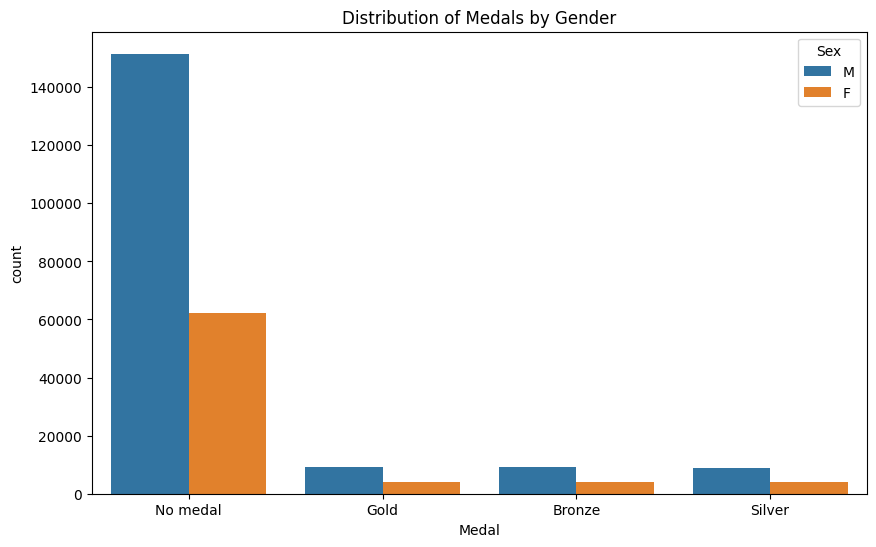

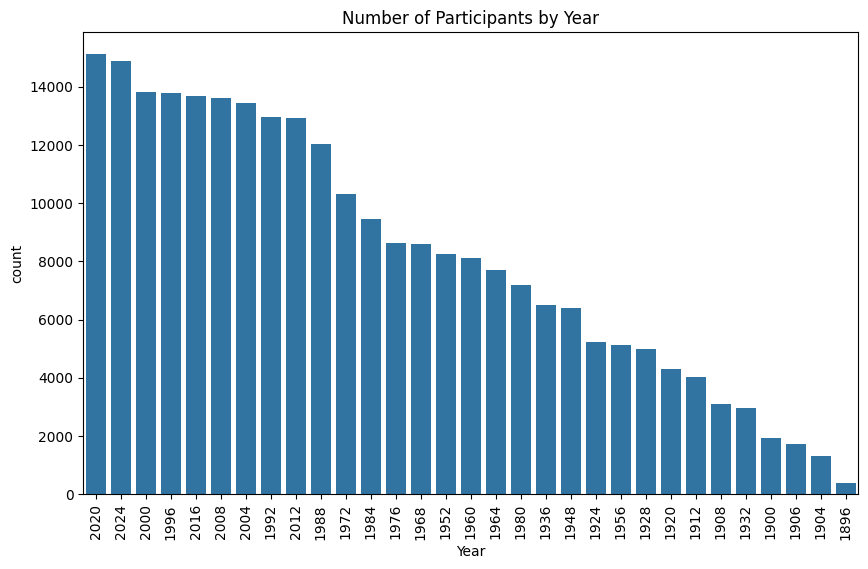

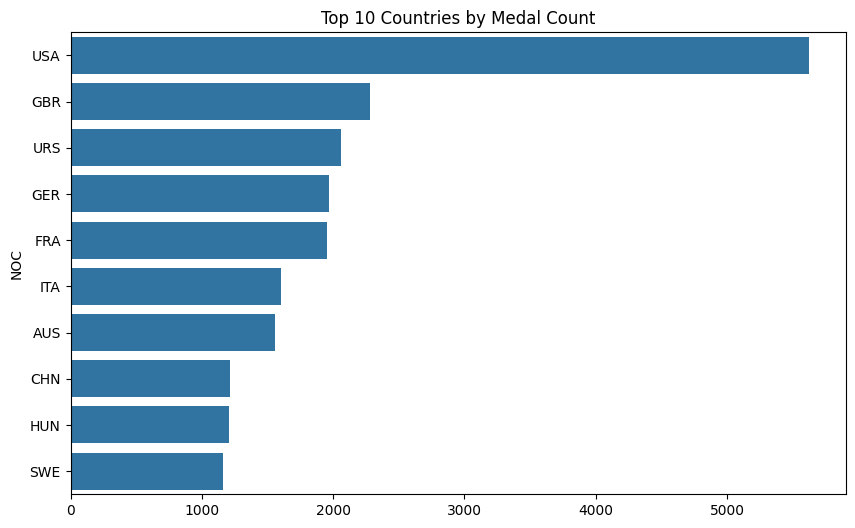

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: Distribution of Medals by Gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Medal', hue='Sex')
plt.title('Distribution of Medals by Gender')
plt.show()

# Plot 2: Number of Participants by Year
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Year', order=df['Year'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Participants by Year')
plt.show()

# Plot 3: Top 10 Countries by Medal Count
top_countries = df[df['Medal'] != 'No medal']['NOC'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Medal Count')
plt.show()


#Step6: Using Plotly library

In [16]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots



In [17]:
#Plot 1: Distribution of Medals by Gender
fig1 = px.histogram(df, x='Medal', color='Sex', title='Distribution of Medals by Gender')
fig1.show()


Output hidden; open in https://colab.research.google.com to view.

In [18]:
#Plot 2: Number of Participants by Year
fig2 = px.histogram(df, x='Year', title='Number of Participants by Year')
fig2.update_xaxes(categoryorder='total descending')
fig2.show()


In [19]:
#Plot 3: Top 10 Countries by Medal Count
top_countries = df[df['Medal'] != 'No medal']['NOC'].value_counts().head(10)
fig3 = px.bar(x=top_countries.values, y=top_countries.index, orientation='h',
              title='Top 10 Countries by Medal Count')
fig3.show()


In [20]:
#Plot 4: Number of Medals by Sport and Gender
fig4 = px.histogram(df, x='Sport', color='Sex', barmode='group', title='Number of Medals by Sport and Gender')
fig4.update_xaxes(categoryorder='total descending')
fig4.show()


Output hidden; open in https://colab.research.google.com to view.

In [21]:
#Plot 5: Multi-Panel Plot - Medal Distribution by Gender and Sport
fig5 = make_subplots(rows=1, cols=2, subplot_titles=('Medal Distribution by Gender', 'Medal Distribution by Sport'))

# Subplot 1: Medal Distribution by Gender
fig5.add_trace(go.Histogram(x=df['Medal'], marker_color='indianred', name='Gender'),
               row=1, col=1)

# Subplot 2: Medal Distribution by Sport
fig5.add_trace(go.Histogram(x=df['Sport'], marker_color='blue', name='Sport'),
               row=1, col=2)

fig5.update_layout(title_text='Medal Distribution by Gender and Sport', showlegend=False)
fig5.show()


Output hidden; open in https://colab.research.google.com to view.